# Crypto Market Analysis

* Cryptocurrencies have gone mainstream due to Twitter and other forms of social media. Due to the rising interest in this new form of blockchain technology, I wanted to use data and see how the market has been moving

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (12, 6)})
%matplotlib inline
sns.set_style('whitegrid')

* Used Kaggle to find the dataset of Cryptocurrency prices daily since inception.

In [2]:
data = pd.read_csv("crypto-markets.csv")
data['date'] = pd.to_datetime(data['date'])

In [3]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


* After looking at the columns, we can see that all of the data looks somewhat normal besides the volume and market. These numbers are very large so lets convert them into billions

In [4]:
data["MarketinBillions"] = data.market / 1000000000
data["VolumeinBillions"] = data.volume / 1000000000
data = data.drop(columns=["market", "volume"])
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,close_ratio,spread,MarketinBillions,VolumeinBillions
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.5438,3.88,1.50052,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.7813,13.49,1.49116,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.3843,12.88,1.59778,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.2882,32.17,1.54282,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.3881,33.32,1.29219,0.0


* Going to make a table of all the closing prices for each of the currencies

In [5]:
wide = data.groupby(["date","name"])['close'].last().unstack()

## Top 10 cryptocurrenies as of today

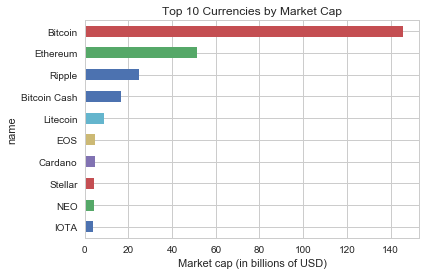

In [6]:
top10 = data.groupby(['name'])['MarketinBillions'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
top10.set_xlabel("Market cap (in billions of USD)");
plt.title("Top 10 Currencies by Market Cap");

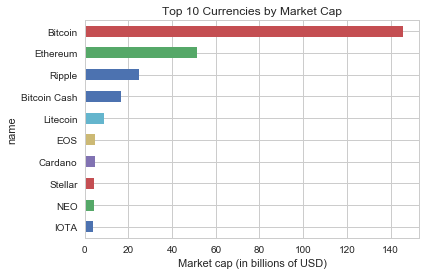

In [7]:
top10market = data.groupby(['name'])['MarketinBillions'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
top10market.set_xlabel("Market cap (in billions of USD)");
plt.title("Top 10 Currencies by Market Cap");

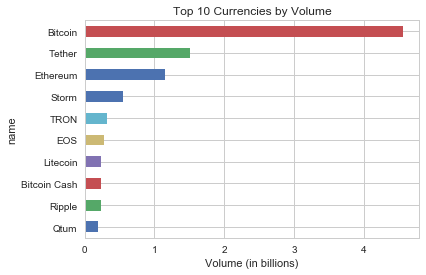

In [8]:
top10volume = data.groupby(['name'])['VolumeinBillions'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
top10volume.set_xlabel("Volume (in billions)");
plt.title("Top 10 Currencies by Volume");

Going to simplify to the top 5 cryptos

In [9]:
top5names = data.groupby(["name"])["MarketinBillions"].last().sort_values(ascending=False).head().index;
dataoftop5 = data[data["name"].isin(top5names)];

## Plotting Trends

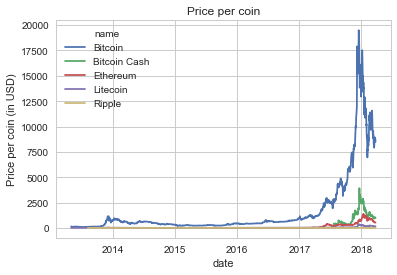

In [10]:
ax = dataoftop5.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per coin (in USD)");
plt.title("Price per coin");

* We can see a huge spike in late 2017 

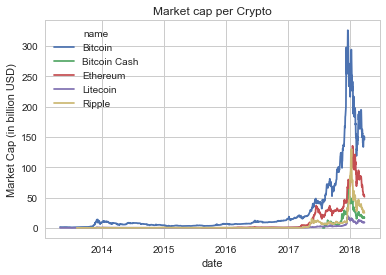

In [11]:
ax = dataoftop5.groupby(['date', 'name'])['MarketinBillions'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Crypto");

* Looking at the plot, we can see that total value of the coins have dropped almost by have since end of 2017.

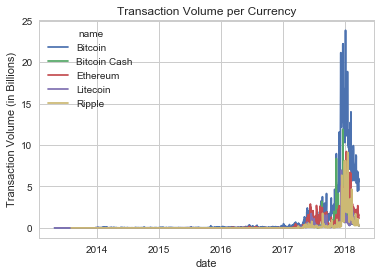

In [12]:
ax = dataoftop5.groupby(['date', 'name'])['VolumeinBillions'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in Billions)");
plt.title("Transaction Volume per Currency");

* Another huge drop in volume. To sustain prices, there needs to be an influx of new money...seems like investors are afraid to trade more now so could be a cause of price drops. But why? Are prices too high at the moment? Bubble?

## Trends since 2017

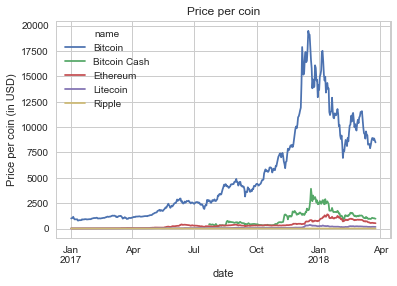

In [13]:
ax = dataoftop5[dataoftop5.date.dt.year >= 2017].groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per coin (in USD)");
plt.title("Price per coin");

* Prices are relatively high compared to the start of 2017 still. better ROI than the stock market?

## Correlation between top 5 coins

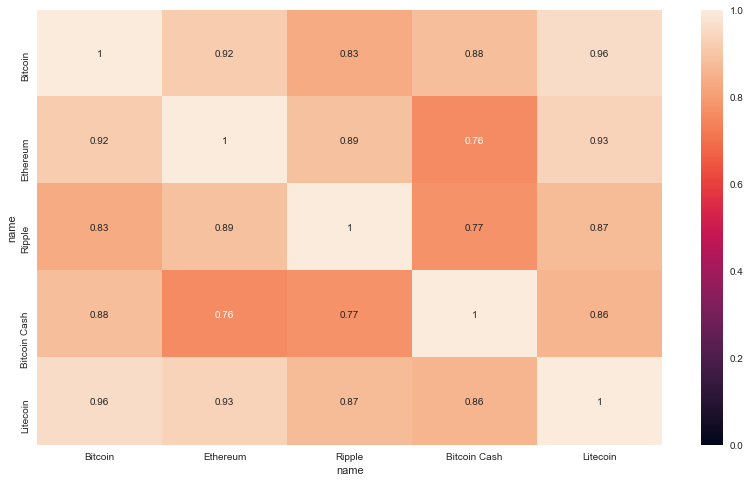

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(wide[top5names].corr(),vmin=0, vmax=1, annot=True);

## What happens if you invested X dollars, Y years ago?

In [15]:
def plot_roi(amount, df):
    ((amount / df.iloc[0]) * df).plot(figsize=(12,8))

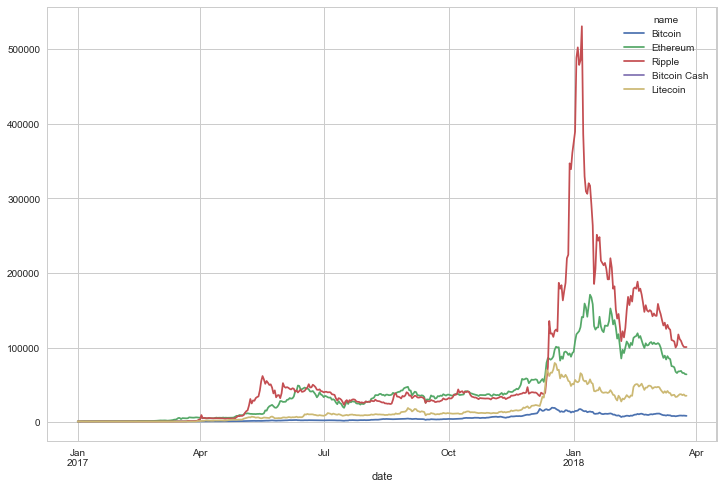

In [16]:
top5in2017 = wide[(wide.index.year >= 2017)]
plot_roi(1000, top5in2017[top5names])

* Ripple has performed extremely well. A lot of interest has been on Bitcoin, but other coins have produced even higher ROI.

* Theory: Lower price -> people buy more. Doesn't mean it is better technology though.

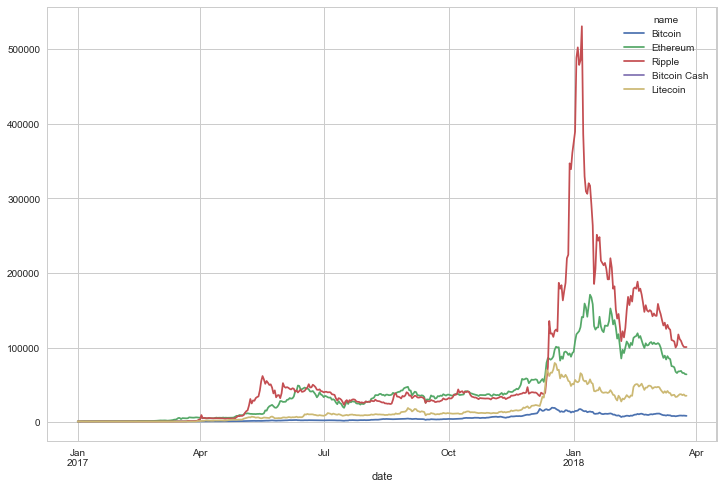

In [17]:
top5inlate2017 = wide[(wide.index.year >= 2017) & (wide.index.month >= 10)]
plot_roi(1000, top5in2017[top5names])

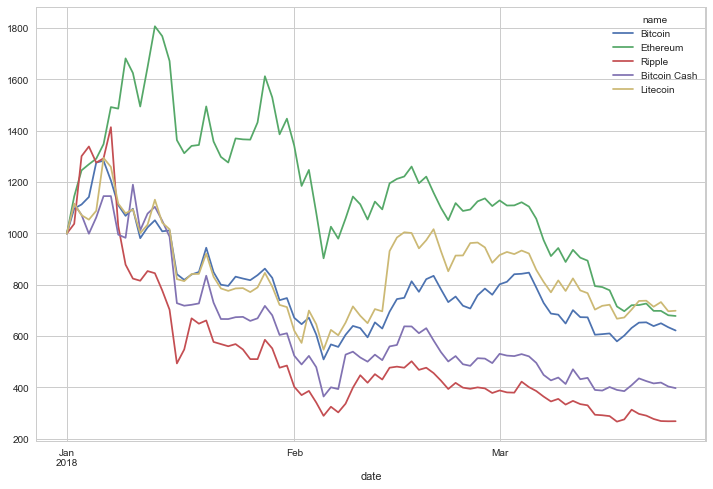

In [18]:
top5in2018 = wide[(wide.index.year == 2018)]
plot_roi(1000, top5in2018[top5names])

* Heatplot earlier + this plot show further proof that these top 5 cryptos are pretty well correlated to one another